# SVHM Handwriten Digit Classification 

This is the main training file of the logistic/softmax classifier on SVHN.

#### Import All Relevant Modules

In [1]:
import os
import time as timer

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as T

## My own modules
import viz_utils as vu
import train_utils as tu
import model_utils as mu
###

import imp
imp.reload(vu)
imp.reload(mu)
imp.reload(tu)


/var/folders/wb/ttr9x7pn27q1_rp5vtjfr0s00000gn/T/ipykernel_4416/2999939050.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'train_utils' from '/Users/mghifary/Work/govtech/codes/AI/deeplearning/train_utils.py'>

#### Constants

In [2]:
DATA_DIR = "../data"
MODEL_DIR = "../models"

EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 1e-4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

#### Load SVHN dataset

In [3]:
# Load dataset
training_data = datasets.SVHN(
    root=DATA_DIR, 
    split='train', 
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

test_data = datasets.SVHN(
    root=DATA_DIR,
    split='test',
    download=True,
    transform=T.ToTensor(), #convert to Tensor and normalize to (0, 1)
)

Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat


In [4]:
# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:
type(training_data.data)

numpy.ndarray

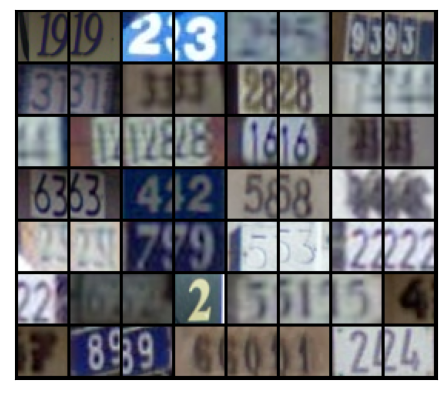

In [6]:
grid = vu.set_grid(training_data.data, num_cells=56)
vu.show(grid)

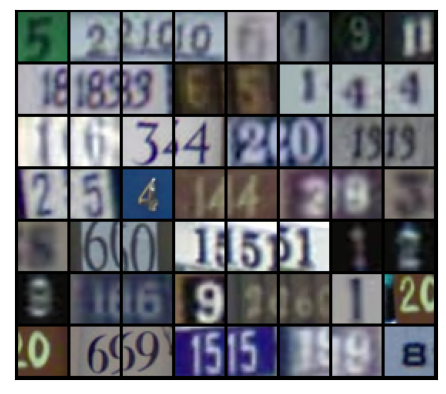

In [7]:
grid = vu.set_grid(test_data.data, num_cells=56)
vu.show(grid)

#### Create the model

In [8]:
print(f"Using {DEVICE} device")

# Define model
model = mu.ConvNetSVHN(d_out=10, c=3).to(DEVICE)
print(model)

# Persistent file to store the model
model_path = os.path.join(MODEL_DIR, "convnet_svhn.pth")

Using cpu device
ConvNetSVHN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


#### Define the loss function and the optimizer

In [9]:
loss_fn = nn.CrossEntropyLoss()

# optimizer = optim.SGD(
#     model.parameters(), 
#     lr=LEARNING_RATE
# )

optimizer = optim.Adam(
    model.parameters(), 
    lr=LEARNING_RATE
)

#### Execute the training!

In [10]:
for t in range(EPOCHS):
    print(f"Epoch {t+1} out of {EPOCHS}\n ------------")
    
    start = timer.time()
    tu.train(train_dataloader, model, loss_fn, optimizer)
    elapsed_time = timer.time() - start # this timing method ONLY works for CPU computation, not for GPU/cuda calls
    print(f" > Training time: {elapsed_time:>.2f} seconds")
    
    tu.test(test_dataloader, model, loss_fn)
    
    # Save model
    torch.save(model.state_dict(), model_path)
    print(f"Model {model_path} stored!")
    
print("Done!")

Epoch 1 out of 10
 ------------
Loss: 2.294925 [    0]/73257
Loss: 2.214289 [ 6400]/73257
Loss: 2.204151 [12800]/73257
Loss: 1.588038 [19200]/73257
Loss: 1.045230 [25600]/73257
Loss: 0.774918 [32000]/73257
Loss: 0.582049 [38400]/73257
Loss: 0.953231 [44800]/73257
Loss: 0.686906 [51200]/73257
Loss: 0.532173 [57600]/73257
Loss: 0.670285 [64000]/73257
Loss: 0.571084 [70400]/73257
 > Training time: 73.62 seconds
Test Error: 
 Accuarcy: 83.8%, Avg loss: 0.593817 

Model ../models/convnet_svhn.pth stored!
Epoch 2 out of 10
 ------------
Loss: 0.485883 [    0]/73257
Loss: 0.495444 [ 6400]/73257
Loss: 0.624916 [12800]/73257
Loss: 0.546055 [19200]/73257
Loss: 0.387394 [25600]/73257
Loss: 0.440696 [32000]/73257
Loss: 0.357448 [38400]/73257
Loss: 0.781604 [44800]/73257
Loss: 0.459600 [51200]/73257
Loss: 0.359216 [57600]/73257
Loss: 0.535758 [64000]/73257
Loss: 0.444670 [70400]/73257
 > Training time: 73.70 seconds
Test Error: 
 Accuarcy: 85.6%, Avg loss: 0.534690 

Model ../models/convnet_svhn.pt